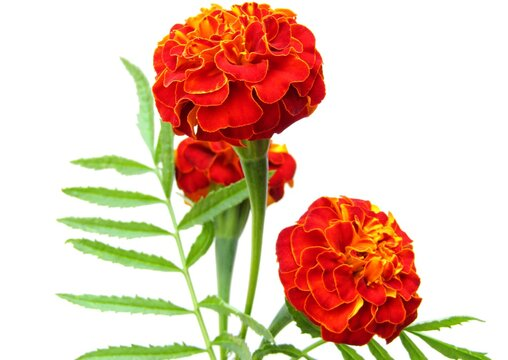

In [ ]:
# Python code to read image
import cv2
from google.colab.patches import cv2_imshow

# To read image from disk, we use
# cv2.imread function, in below method,
img= cv2.imread("/content/merigold.jpg")

# Creating GUI window to display an image on screen
# first Parameter is windows title (should be in string format)
# Second Parameter is image array
cv2_imshow(img)

print( img.shape )
print( img.size )


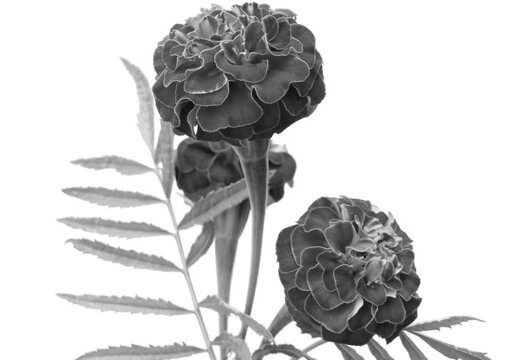

In [ ]:
# Using 0 to read image in grayscale mode
gray = cv2.imread("/content/merigold.jpg", cv2.IMREAD_GRAYSCALE)
cv2_imshow(gray)

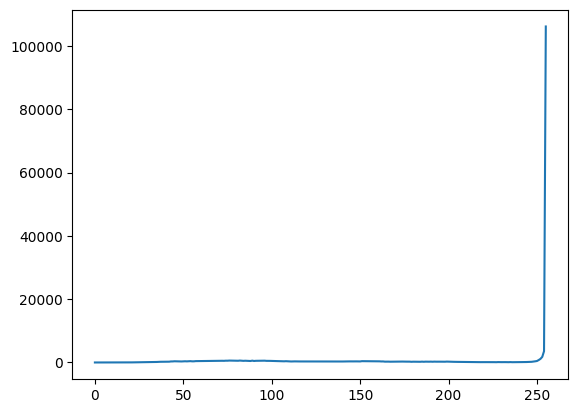

In [ ]:
# importing library for plotting
from matplotlib import pyplot as plt
# find frequency of pixels in range 0-255

#images : it is the source image of type uint8 or float32 represented as “[img]”.
#channels : it is the index of channel for which we calculate histogram. For grayscale image, its value is [0] and
#color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
#mask : mask image. To find histogram of full image, it is given as “None”.
#histSize : this represents our BIN count. For full scale, we pass [256].
#ranges : this is our RANGE. Normally, it is [0,256].

histr = cv2.calcHist([gray],[0],None,[256],[0,256])

# show the plotting graph of an image
plt.plot(histr)
plt.show()

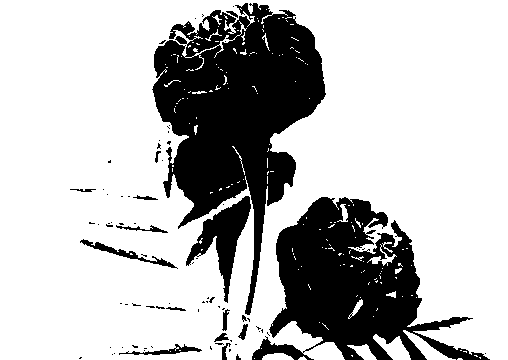

In [ ]:
ret,thresh = cv2.threshold(gray,150,255,0)

# Display the Binary Image
cv2_imshow(thresh)

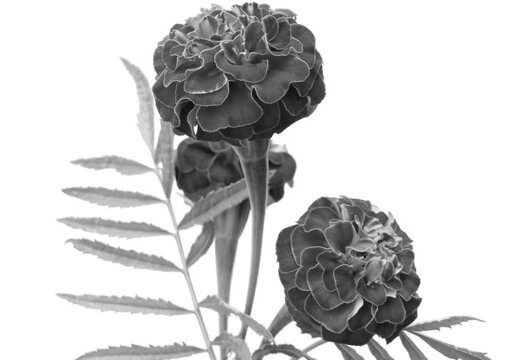

In [ ]:
import numpy as np
kernal_identity= np.array([[0,0,0],[0,1,0],[0,0,0]])
#Apply the filter
output1=cv2.filter2D(img,-1, kernal_identity)
cv2_imshow(output1)

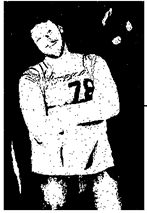

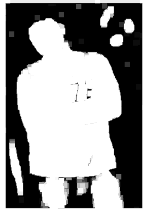

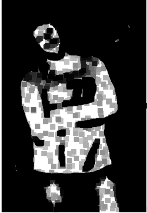

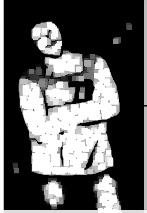

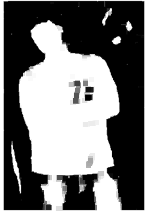

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/dialteleerod.png")

kernel = np.ones((5,5), np.uint8)
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)
cv2_imshow(img)
cv2_imshow(img_dilation)
cv2_imshow(img_erosion)
opening= cv2.morphologyEx(img, cv2.MORPH_OPEN,kernel)
cv2_imshow(opening)

closing= cv2.morphologyEx(img, cv2.MORPH_CLOSE,kernel)
cv2_imshow(closing)
cv2.waitKey(0)

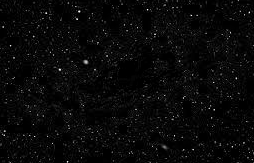

In [ ]:
img = cv2.imread("/content/galaxy.png")
tophat_img = cv2.morphologyEx(img,
                              cv2.MORPH_TOPHAT,
                              kernel)
cv2_imshow(tophat_img)

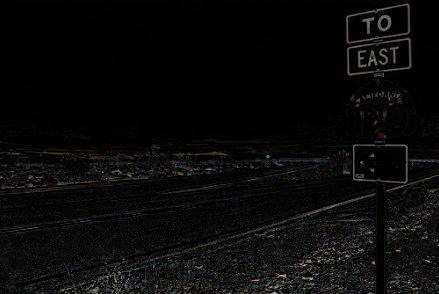

In [ ]:
img = cv2.imread("/content/blackhat.png")
tophat_img = cv2.morphologyEx(img,
                              cv2.MORPH_BLACKHAT,
                              kernel)
cv2_imshow(tophat_img)

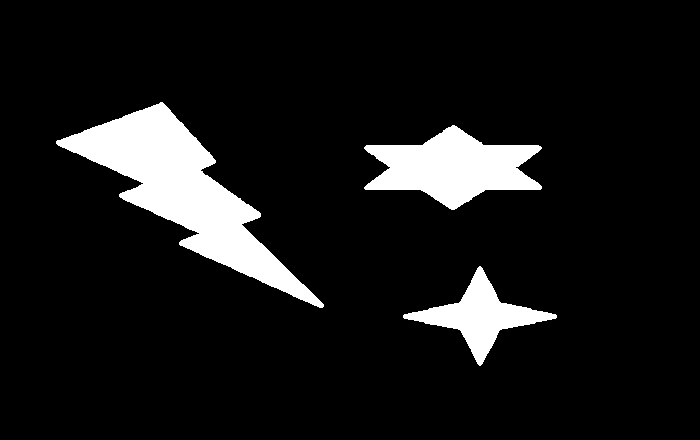

127.0
Number of contours detected: 3


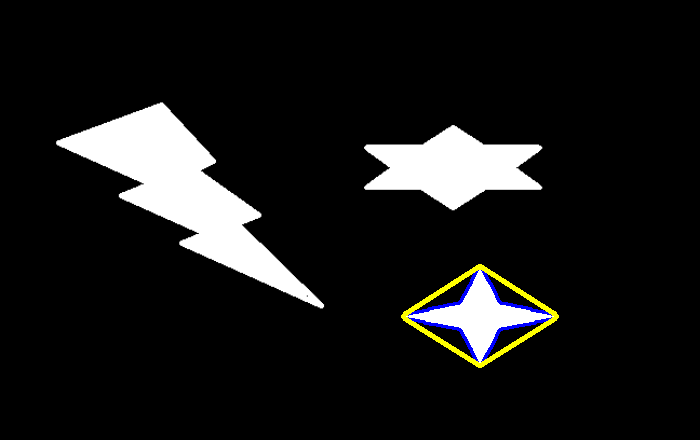

In [ ]:
# import required libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# load the input image
img = cv2.imread('/content/394091-1664347624.png')

# convert the input image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply thresholding to convert grayscale to binary image
ret,thresh = cv2.threshold(gray,127, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
print(ret)
# find the contours

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST,
                                       cv2.CHAIN_APPROX_NONE)
image_contours = np.zeros(img.shape)
imgcon=cv2.drawContours(image_contours, contours, -1, (0,255,0), 3)
#cv2_imshow(imgcon)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,
                                       cv2.CHAIN_APPROX_NONE)
print("Number of contours detected:", len(contours))
# select the first contour
cnt = contours[0]

# find the convex hull using the contour
hull = cv2.convexHull(cnt)

# draw contour and convex hull on the input image
img = cv2.drawContours(img,[cnt],0,(255,0,0),2)
img = cv2.drawContours(img,[hull],0,(0,255,255),3)

# display the image with drawn contour and convex hull
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()